In [26]:
# Import helper libraries
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, Activation

from PIL import Image

import keras
from keras import optimizers
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Path of training and tresting set
train_dir = '../data/train'
test_dir = '../data/test'

# Get the list of files in the traning and testing folder
train_count = len(os.listdir(train_dir))
test_count = len(os.listdir(test_dir))

print(f'Total number of data in training set: {train_count}')
print(f'Total number of data in training set: {test_count}')

Total number of data in training set: 10
Total number of data in training set: 10


In [28]:
# Set labels
labels = [str(label) for label in range(train_count)]

img_size = 64  # Adjust the size as needed

def load_images(data_dir):
    data = []
    
    # Traverse through person folders
    for label in labels:
        person_path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        # Traverse through L and R folders
        for lr_folder in os.listdir(person_path):
            lr_path = os.path.join(person_path, lr_folder)
            
            # Check if the L or R exists
            if os.path.exists(lr_path):
                
                # Traverse through subfolders
                for filename in os.listdir(lr_path):
                    try:
                        img_path = os.path.join(lr_path, filename)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)[...,::-1]
                        img = cv2.resize(img, (img_size, img_size))  

                        data.append([img, class_num])
                        print(f"Done processing: {img_path}, labeled as: {class_num}")

                    except Exception as e:
                        print(f"Error processing: {img_path}, {e}")

    return np.array(data, dtype=object)

# Set labels
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [29]:
# Load training images
train = load_images(train_dir)

Done processing: ../data/train\0\L\S0L01.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L02.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L03.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L04.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L05.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L06.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L07.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L08.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L09.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L10.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L11.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L12.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L13.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L14.jpg, labeled as: 0
Done processing: ../data/train\0\L\S0L15.jpg, labeled as: 0
Done processing: ../data/train\0\R\S0R01.jpg, labeled as: 0
Done processing: ../data/train\0\R\S0R02

Done processing: ../data/train\6\R\S6R07.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R08.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R09.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R10.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R11.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R12.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R13.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R14.jpg, labeled as: 6
Done processing: ../data/train\6\R\S6R15.jpg, labeled as: 6
Done processing: ../data/train\7\L\S7L01.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L02.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L03.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L04.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L05.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L06.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L07.jpg, labeled as: 7
Done processing: ../data/train\7\L\S7L08

In [30]:
# Get training set shape
print(f'Training set shape: {train.shape}')

Training set shape: (300, 2)


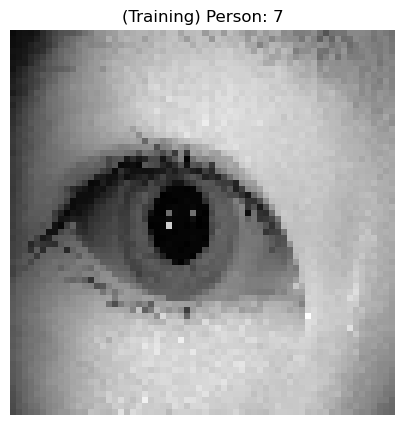

In [31]:
# Get random image
index = random.randrange(len(train))

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(train[index][0], cmap='gray')  # Assuming the image is stored as (64, 64, 1)
plt.title(f"(Training) Person: {train[index][1]}")
plt.axis('off')
plt.show()

In [32]:
# Load testing images
test = load_images(test_dir)
print("Task completed.")

Done processing: ../data/test\0\L\S0L16.jpg, labeled as: 0
Done processing: ../data/test\0\L\S0L17.jpg, labeled as: 0
Done processing: ../data/test\0\L\S0L18.jpg, labeled as: 0
Done processing: ../data/test\0\L\S0L19.jpg, labeled as: 0
Done processing: ../data/test\0\L\S0L20.jpg, labeled as: 0
Done processing: ../data/test\0\R\S0R16.jpg, labeled as: 0
Done processing: ../data/test\0\R\S0R17.jpg, labeled as: 0
Done processing: ../data/test\0\R\S0R18.jpg, labeled as: 0
Done processing: ../data/test\0\R\S0R19.jpg, labeled as: 0
Done processing: ../data/test\0\R\S0R20.jpg, labeled as: 0
Done processing: ../data/test\1\L\S1L16.jpg, labeled as: 1
Done processing: ../data/test\1\L\S1L17.jpg, labeled as: 1
Done processing: ../data/test\1\L\S1L18.jpg, labeled as: 1
Done processing: ../data/test\1\L\S1L19.jpg, labeled as: 1
Done processing: ../data/test\1\L\S1L20.jpg, labeled as: 1
Done processing: ../data/test\1\R\S1R16.jpg, labeled as: 1
Done processing: ../data/test\1\R\S1R17.jpg, labeled as:

In [33]:
# Get training set shape
print(f'Training set shape: {test.shape}')

Training set shape: (100, 2)


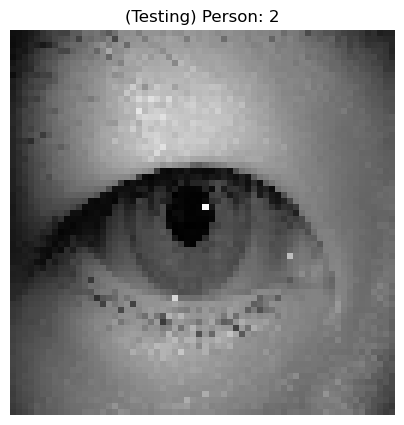

In [34]:
# Get random image
index = random.randrange(len(test))

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(test[index][0], cmap='gray')  # Assuming the image is stored as (64, 64, 1)
plt.title(f"(Testing) Person: {test[index][1]}")
plt.axis('off')
plt.show()

In [35]:
# Split features and labels
x_train = [] # features
y_train = [] # labels
x_test = [] # features
y_test = [] # labels

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [36]:
total_class = len(labels)
total_class

10

In [37]:
# Total number of classes
total_class = len(labels)

# Define the CNN model
model = models.Sequential(name='Thesisinism')

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(total_class, activation='softmax'))  # Change class_num to the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "Thesisinism"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                  │ (None, 62, 62, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 31, 31, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_4 (Conv2D)                  │ (None, 29, 29, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_4 (MaxPooling2D)     │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_5 (Conv2D)                  │ (None, 12, 12, 128)           │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_5 (MaxPooling2D)     │ (None, 6, 6, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 4608)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 128)                   │     589,952 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train,
                      batch_size=10,
                      epochs=100,
                      validation_data=(x_test, y_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1023 - loss: 2.3028 - val_accuracy: 0.1700 - val_loss: 2.3029
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1843 - loss: 2.3008 - val_accuracy: 0.2000 - val_loss: 2.3016
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2110 - loss: 2.3025 - val_accuracy: 0.2900 - val_loss: 2.3004
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2455 - loss: 2.2997 - val_accuracy: 0.3100 - val_loss: 2.2994
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2655 - loss: 2.2992 - val_accuracy: 0.2000 - val_loss: 2.2980
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2842 - loss: 2.2964 - val_accuracy: 0.2100 - val_loss: 2.2968
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2679 - loss: 2.2966 - val_accuracy: 0.2200 - val_loss: 2.2957
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2461 - loss: 2.2947 - val_accuracy: 0.

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8437 - loss: 1.8840 - val_accuracy: 0.9000 - val_loss: 1.8302
Epoch 52/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8744 - loss: 1.8436 - val_accuracy: 0.9000 - val_loss: 1.7985
Epoch 53/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8736 - loss: 1.8233 - val_accuracy: 0.8900 - val_loss: 1.7609
Epoch 54/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8658 - loss: 1.7999 - val_accuracy: 0.8700 - val_loss: 1.7261
Epoch 55/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8448 - loss: 1.7685 - val_accuracy: 0.8700 - val_loss: 1.6856
Epoch 56/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8246 - loss: 1.7219 - val_accuracy: 0.9000 - val_loss: 1.6455
Epoch 57/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8633 - loss: 1.6833 - val_accuracy: 0.8900 - val_loss: 1.6001
Epoch 58/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8950 - loss: 1.6467 - val_accuracy: 0.9300 

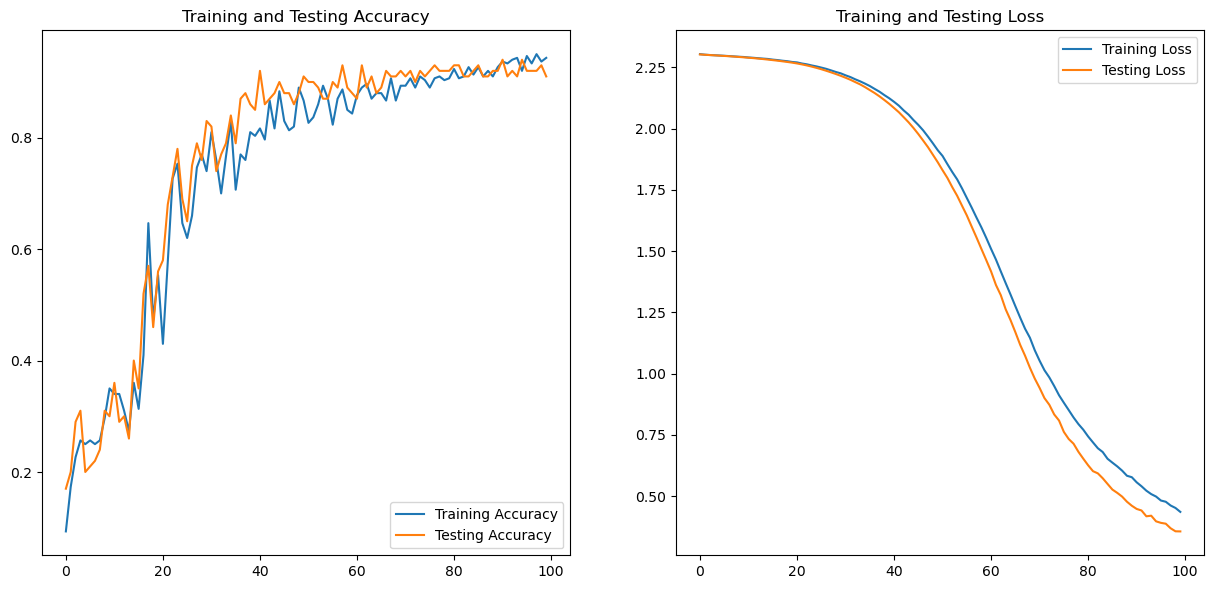

In [40]:
epochs_range = range(100)

acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')


loss = history.history['loss']
test_loss = history.history['val_loss']

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy: {} Test Loss: {}'.format(test_acc*100, test_loss*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9327 - loss: 0.4171
Test accuracy: 91.00000262260437 Test Loss: 51.22014880180359


In [42]:
# Predict
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 0 2 2 2 2 2 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 7 6 7 9]


In [43]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

In [44]:
def check_prediction(index):
    img = test[index][0]
    
    plt.figure(figsize = (5,5))
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    actual_label = test[index][1]
    predicted_label = y_pred[index]
    
    if predicted_label == actual_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.title(f"Person: {actual_label} | Predicted: {predicted_label}", color=color)
    
    plt.axis('off')
    plt.show()

In [45]:
index = random.randrange(len(test))
check_prediction(index)

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
print(classification_report(y_pred, y_test, target_names=labels))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        10
           2       1.00      0.67      0.80        15
           3       1.00      1.00      1.00        10
           4       0.90      1.00      0.95         9
           5       0.50      1.00      0.67         5
           6       1.00      0.91      0.95        11
           7       1.00      0.83      0.91        12
           8       1.00      1.00      1.00        10
           9       0.70      1.00      0.82         7

    accuracy                           0.91       100
   macro avg       0.91      0.93      0.91       100
weighted avg       0.94      0.91      0.91       100



In [48]:
from tensorflow import keras
model1.save('../model/ThesisinismV4.h5')
model1.save('../model/ThesisinismV4.keras')

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(
